# diabetse Prediction Model


## 📖 The Story of Diabetes Prediction 🏥💡

In a world where health is wealth 💖, many people unknowingly suffer from diabetes 🩸. Meet Alex, a young professional who often felt fatigued 😓 but ignored the signs. Little did he know, early detection could change his life!

One day, Alex visited a smart healthcare center 🏥 that used AI-powered diabetes prediction models 🤖. Doctors collected his health data 🩺📊 and ran it through a machine learning system that analyzed symptoms and predicted the likelihood of diabetes with high accuracy 📈.

Thanks to this technology, Alex received an early diagnosis of diabetes 🩸 and started treatment in time. With a healthy lifestyle 🍎🏃‍♂️ and proper medical care, he regained his energy and lived a happier, healthier life! 🎉💪

## Steps for Diabetes Prediction 📝
1. **Import Necessary Libraries** – Load essential libraries for data processing and machine learning.
2. **Load and Explore Data** – Import the dataset and examine its structure.
3. **Data Preprocessing** – Clean and prepare data for better model performance.
4. **Data Visualization** – Understand patterns using graphical analysis.
5. **Model Building** – Train a machine learning model to predict diabetes.
6. **Model Evaluation** – Assess the model’s accuracy and effectiveness.
7. **Conclusion** – Highlight the importance of AI in healthcare.

## Importing libraries

In [18]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import gradient boosting and svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
# import train_test_split
from sklearn.model_selection import train_test_split
# import accuracy_score
from sklearn.metrics import accuracy_score
# import confusion_matrix
from sklearn.metrics import confusion_matrix
# import classification_report
from sklearn.metrics import classification_report
# import roc_curve
from sklearn.metrics import roc_curve
# import roc_auc_score
from sklearn.metrics import roc_auc_score
# impory neural network
from sklearn.neural_network import MLPClassifier
# import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


## load the data 

In [19]:
df = pd.read_csv("./datasets/diabetes.csv")

In [20]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [22]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [23]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


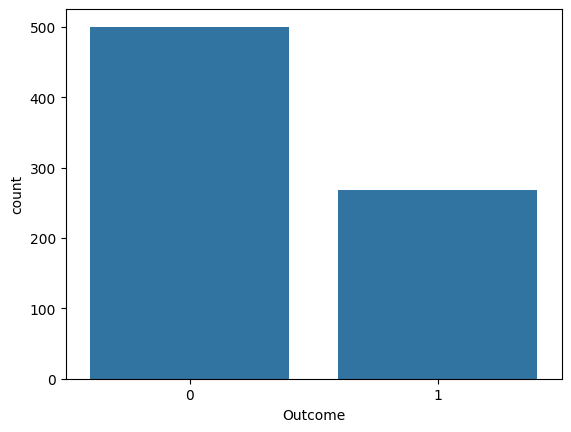

In [24]:
# countplot
sns.countplot(x='Outcome', data=df)
plt.show()

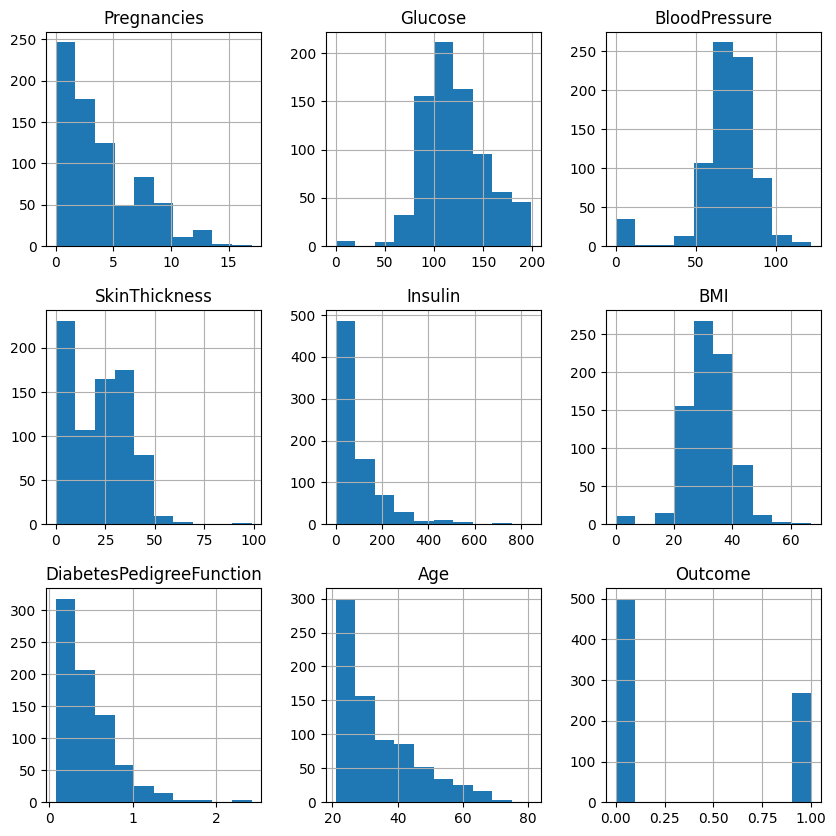

In [25]:
# create histogram
df.hist(figsize=(10,10))
plt.show()

In [26]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [27]:
# data shpae
df.shape

(768, 9)

In [29]:
# age column
df['Age'].min(), df['Age'].max()

(21, 81)

In [31]:
# let's summarie the age column
df['Age'].describe()

count    768.000000
mean      33.240885
std       11.760232
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: Age, dtype: float64

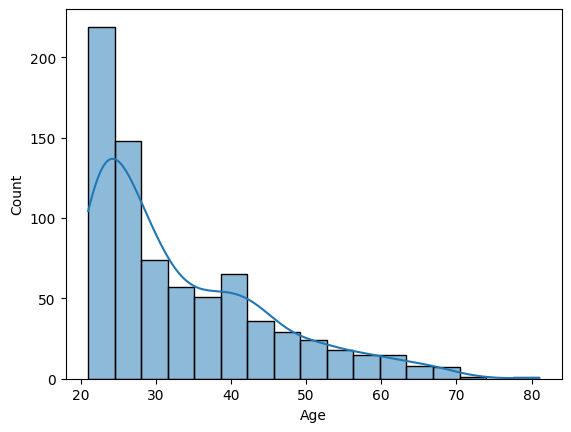

In [32]:
# draw a histogram to see the distribution of age column
sns.histplot(df['Age'], kde=True)
plt.show()

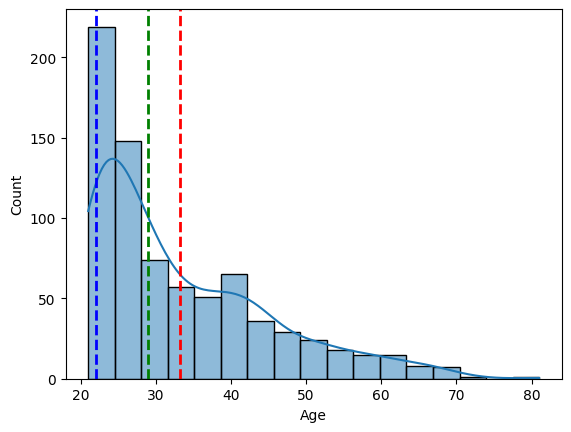

Mean:  33.240885416666664
Median: 29.0
Mode: 22


In [33]:
# plot the mean, median and mode of age column using sns
sns.histplot(df['Age'], kde=True)
plt.axvline(df['Age'].mean(), color='r', linestyle='dashed', linewidth=2)
plt.axvline(df['Age'].median(), color='g', linestyle='dashed', linewidth=2)
plt.axvline(df['Age'].mode()[0], color='b', linestyle='dashed', linewidth=2)
plt.show()

# print the value of mean, median and mode of age column
print("Mean: ", df['Age'].mean())
print('Median:', df['Age'].median())
print('Mode:', df['Age'].mode()[0])

In [38]:
import plotly.express as px

# Assuming your DataFrame is named df
fig = px.histogram(data_frame=df, x='Age', color='Insulin')
fig.show()


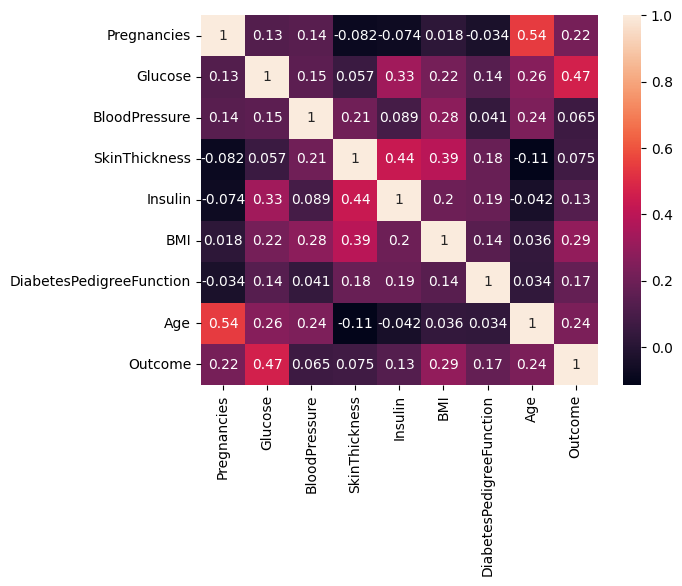

In [39]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [40]:
# make box plots of all the numeric columns using for loop and plotly
fig = px.box(data_frame=df, y='Age')
fig.show()

fig = px.box(data_frame=df, y='Insulin')
fig.show()

fig = px.box(data_frame=df, y='Pregnancies')
fig.show()

fig = px.box(data_frame=df, y='BMI')
fig.show()

In [42]:
df[df['Pregnancies'] == 0]
# remove this row from dataset
df = df[df['Pregnancies'] != 0]

In [43]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0


In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

# Separate features and target variable
X = df.drop(columns=['Outcome'])  # Features
y = df['Outcome']  # Target variable

# Apply feature selection using SelectKBest with ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=5)  # Select top 5 features
X_selected = selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features.tolist())

# Scale the selected features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Convert scaled data back to DataFrame for reference
df_scaled = pd.DataFrame(X_scaled, columns=selected_features)

# Display first few rows of the scaled dataset
print(df_scaled.head())

Selected Features: ['Pregnancies', 'Glucose', 'BMI', 'DiabetesPedigreeFunction', 'Age']
   Pregnancies   Glucose       BMI  DiabetesPedigreeFunction       Age
0     0.468243  0.848391  0.272529                  0.521014  1.338455
1    -1.087043 -1.097943 -0.683433                 -0.359057 -0.270398
2     1.090358  1.929689 -1.134100                  0.664503 -0.185721
3    -1.087043 -0.974366 -0.478584                 -0.945770 -1.117162
4     0.157186 -0.140223 -0.819998                 -0.837356 -0.355074


In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# import pipeline
from sklearn.pipeline import Pipeline

In [53]:
# call the model
models = [
 ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
 ('Support Vector Machine', SVC(random_state=42)),
 ('Neural Network', MLPClassifier(random_state=42))
 ]

In [54]:
best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('model', model)
    ])
    
    # Perform cross-validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    
    # Calculate mean accuracy
    mean_accuracy = scores.mean()
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)
    
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the performance metrics
    print("Model:", name)
    print("Cross-validation Accuracy:", mean_accuracy)
    print("Test Accuracy:", accuracy)
    print()
    
    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the best model
print("Best Model:", best_model)

Model: Gradient Boosting
Cross-validation Accuracy: 0.7333333333333333
Test Accuracy: 0.7045454545454546

Model: Support Vector Machine
Cross-validation Accuracy: 0.7561904761904763
Test Accuracy: 0.7272727272727273

Model: Neural Network
Cross-validation Accuracy: 0.6761904761904761
Test Accuracy: 0.6363636363636364

Best Model: Pipeline(steps=[('model', SVC(random_state=42))])


In [55]:
# evaluate the best model f1 score roc_auc_curve
from sklearn.metrics import f1_score, roc_auc_score

y_pred = best_model.predict(X_test)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, best_model.decision_function(X_test))


print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)


F1 Score: 0.5909090909090909
ROC AUC Score: 0.7785123966942149



### Conclusion 🎯💊

With machine learning, early diabetes detection is now possible! 🏥 By analyzing patient data, healthcare providers can diagnose diabetes faster, ensuring timely treatment and healthier lives. 🌍💙

Thanks to AI, many like Alex can live healthier and happier lives! 🚀😊

---

The End 🎬🎉
